In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys
os.environ['DEBUG'] = '1'
os.environ['EVAL_OBJECTS'] = '1'


In [3]:
import jax
from housemaze import env
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from IPython.display import display, Markdown
from nicewebrl import stages as nice_stages

import matplotlib.pyplot as plt
import experiment_2 as experiment


No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Compiling jax environment functions.
	time: 1.1142032146453857
Compiling multi-render function.
	time: 0.0698099136352539
Compiling multi-render function.
	time: 0.05431818962097168


# Note that below I've turned off randomization via DEBUG=2 to make it easier to analyze

# Manipulation 2:

## faster when on-path but further than off-path but closer

 
        In both tests, a shortcut is introduced. In the first, the agent is tested on the same path it trained on. In the second, the agent is tested on a different path.
        

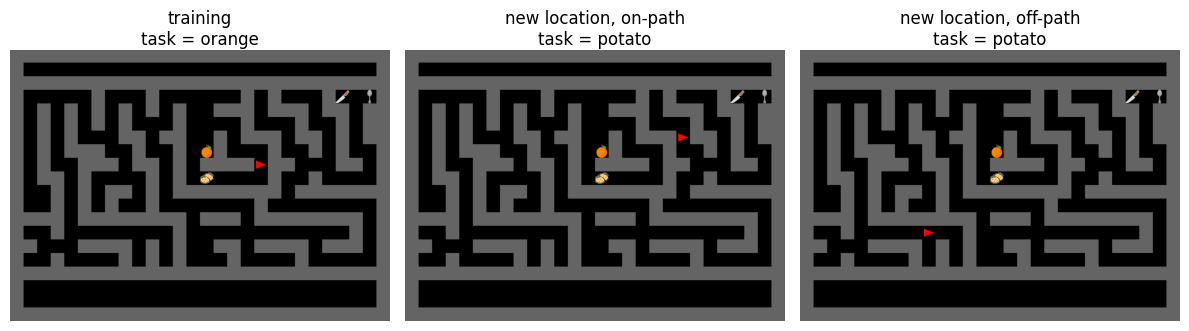

# Manipulation 3:

## reusing longer of two paths which matches training path

 
        Here there are two paths to the test object. We predict that people will take the path that was used to get to the training object.
        

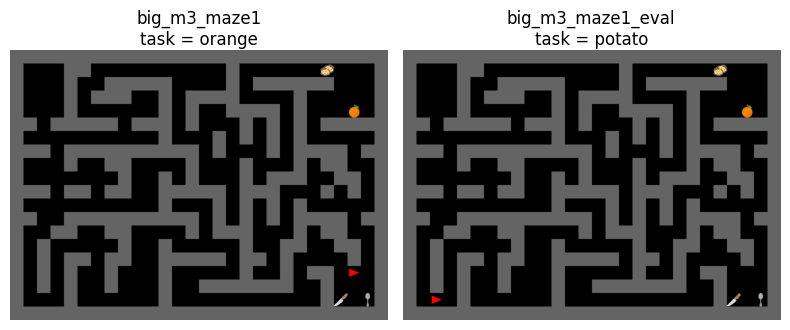

# Manipulation 4:

## See if faster off train path than planning.

 
        Here there are two branches from a training path. We predict that people will have a shorter response time when an object is in the same location it was in phase 1.
        

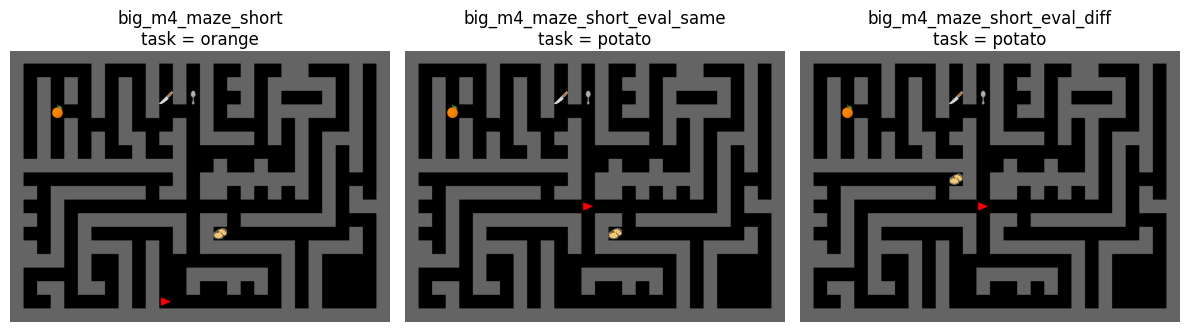

# Manipulation 4:

## See if faster off train path than planning.

 
        Here there are two branches from a training path. We predict that people will have a shorter response time when an object is in the same location it was in phase 1.
        

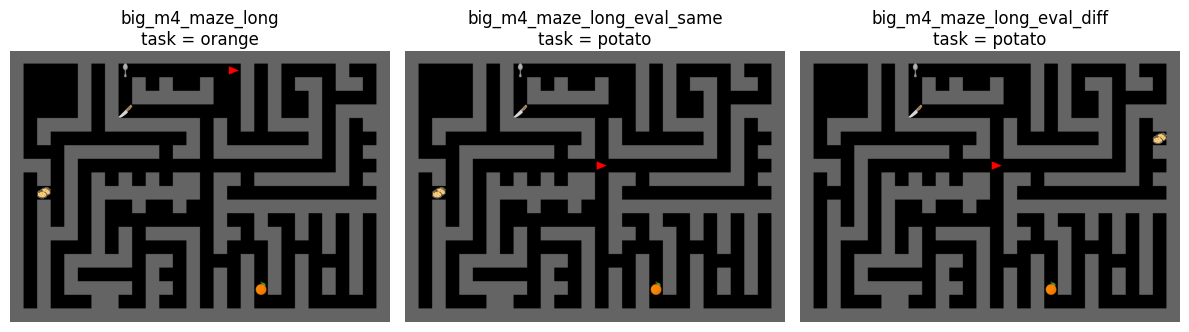

# Manipulation None:

## feedback

 None

ValueError: Number of columns must be a positive integer, not 0

<Figure size 0x400 with 0 Axes>

In [4]:

image_keys = experiment.image_keys
manipulation_group = experiment.groups[0]
train_object = manipulation_group[0]
test_object = manipulation_group[1]

def create_env_stage_figure(env_stages, rng):
    num_stages = len(env_stages)

    width = 4
    # Create subplots based on the number of stages
    fig, axes = plt.subplots(1, num_stages, figsize=(width * num_stages, width))
    
    if num_stages == 1:
        axes = [axes]  # Make axes iterable if there's only one subplot
    
    
    for ax, stage in zip(axes, env_stages):
        timestep = stage.web_env.reset(rng, stage.env_params)
        image = stage.render_fn(timestep)
        
        ax.imshow(image)
        ax.axis('off')
        title = stage.metadata.get('desc', '') or stage.name
        if stage.metadata['eval']:
            category = image_keys[test_object]
        else:
            category = image_keys[train_object]
        title += f'\ntask = {category}'

        ax.set_title(title, wrap=True)
    
    plt.tight_layout()
    return fig

rng = jax.random.PRNGKey(42)
for block in experiment.all_blocks[2:]:
    display(Markdown(f"# Manipulation {block.metadata.get('manipulation')}:"))
    display(Markdown(f"## {block.metadata.get('desc')}"))
    display(Markdown(f" {block.metadata.get('long')}"))
    env_stages = [stage for stage in block.stages if isinstance(stage, nice_stages.EnvStage)]
    # [print(stage.metadata) for stage in block.stages]
    rng, rng_ = jax.random.split(rng)
    create_env_stage_figure(env_stages, rng)
    plt.show()
    # for stage in block.stages:
    #     pprint(stage.metadata)
